In [161]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from tqdm import tqdm

In [109]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

In [126]:
def preproccessing_alpha(train, test):
    """
    подготоваливаем данные
    
    @return all_data
    """
    # выделяем цели в отдельный столбец
    y = train['TARGET']
    # отделяем TARGET от тренировачных данных
    train = train.drop('TARGET', axis=1)
    # соеденим train и test
    # чтобы индексация было с 0 - n-1 , игнорирую начальную.
    all_data = pd.concat([train, test], ignore_index=True)
    return all_data, y 

In [130]:
def split_dataframe(dataframe, index):
    """
    делим данные на тренировачные и тестовые по индексу
    
    @return data_train, data_test
    """
    # Вновь разделите на train и test (не мешая)
    # t_data.
    data_train = dataframe[:index]
    data_test = dataframe[index:]
    return data_train, data_test


In [131]:
def cal_predict(x_train, y_train, x_test, blackbox):
    """
    Строим модель прогнозирования на основе черного ящика
    
    @return predict, predict_proba 
    """
    model = blackbox # у квалификатора есть своё случайное значение.
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    predict_proba = model.predict_proba(x_test)
    return predict, predict_proba

In [ ]:
def draw_hist(y_test, result_predicts):
    #TODO
    pass

In [193]:
def draw_roc_auc_multy(y_test, result_predicts):
    plt.figure(figsize=(10, 15))
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))
    for data in result_predicts:
        predict_prob, depth = data
        score = roc_auc_score(y_test, predict_prob[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:,1])
        plt.plot(fpr, tpr, label=f'ROC {score:.3f} {depth}')
    plt.legend( borderaxespad=0.)

In [132]:
def draw_roc_auc(y_test, predict_prob, tittle=""):
    """
    Считаем и рисуем  roc_auc метрику.
    """
    #TODO что мы считаем в roc_auc_score
    score = roc_auc_score(y_test, predict_prob[:,1])
    #
    fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:,1])
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.title(f'ROC curve {tittle} {score:.3f}')
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))

## ГОТОВИМ ДАННЫЕ

In [133]:
train = pd.read_csv('./data/03_santander_train.csv', index_col='ID')

In [134]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [135]:
test = pd.read_csv('./data/03_santander_test.csv', index_col='ID')

In [136]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [137]:
all_data, y = preproccessing_alpha(train, test)
# данные в полном порядке, все вещественные. Пропусков нет.
all_data.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Data columns (total 369 columns):
var3                             151838 non-null int64
var15                            151838 non-null int64
imp_ent_var16_ult1               151838 non-null float64
imp_op_var39_comer_ult1          151838 non-null float64
imp_op_var39_comer_ult3          151838 non-null float64
imp_op_var40_comer_ult1          151838 non-null float64
imp_op_var40_comer_ult3          151838 non-null float64
imp_op_var40_efect_ult1          151838 non-null float64
imp_op_var40_efect_ult3          151838 non-null float64
imp_op_var40_ult1                151838 non-null float64
imp_op_var41_comer_ult1          151838 non-null float64
imp_op_var41_comer_ult3          151838 non-null float64
imp_op_var41_efect_ult1          151838 non-null float64
imp_op_var41_efect_ult3          151838 non-null float64
imp_op_var41_ult1                151838 non-null float64
imp_op_var39_efect_ult1          1518

In [142]:
data_train, data_test = split_dataframe(all_data, y.shape[0])

## Выполнение основного задания

In [143]:
# Делаем hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
predict_probs=[]
for depth in tqdm(range(1,15,2)):
    blackbox = DecisionTreeClassifier(max_depth=depth, random_state=42)
    predict, predict_prob = cal_predict(
        x_train=X_train,
        x_test=X_test,
        y_train=y_train,
        blackbox=blackbox
    )
    predict_probs.append(( predict_prob, depth)) 

100%|██████████| 7/7 [00:19<00:00,  2.76s/it]


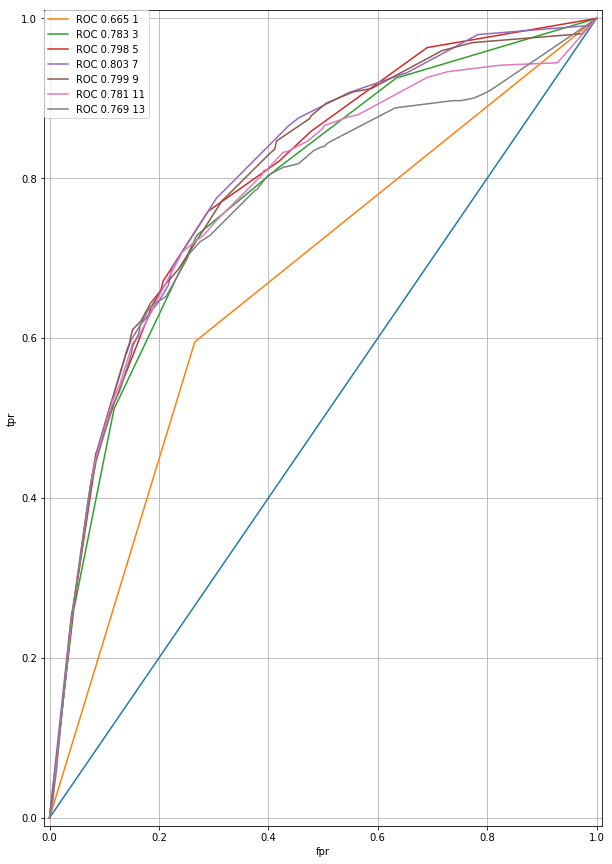

In [194]:
draw_roc_auc_multy(y_test, predict_probs)

In [14]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(dtc, feature_names=train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0f\xdb\x00\x00\x03\x07\x08\x06\x00\x00\x00#o\xd6O\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddw|\x95\xe5\xdd\xc7\xf1\xefY\xd9{/\x92\x900d\xc9\x06\x85\x80\x06\x82<\x15\xb7B\xeah}\xb4V\xc5E\xab\xb5Zk\xab\xd5V\xa4\xdaR[g\xadB\xab\x8f\x02N\x14E \x8a,\t[\xa0\xec,\x92\x90\x10\xb2\xd7\xc98\xeb\xf9\xe3\xc0\x91@\x08\xd3\x04\xe4\xf3~\xbd\xf2R\xae\xfb\xba\xae\xfbw\xdd\xc0_7\xdf\xfbgp\xb9\\.\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00p\xfex\xcf\xd8\xd5\x15\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd0\xd9\x08\xdb\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xce;\x84\xed\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe7\x1dsW\x17\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xf3577\xeb\xf3\xcf?\x97\xc3\xe1\xe8\xeaR\x80\xef\x8d\xc9d\xd2\xe5\x97_.\x1f\x1f\x9f\xae.\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9c\x85\x08\xdb\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe7\xa1\xcf?\xff\\\xd7_\x7f}W\x97\x01|\xef>\xf8\xe0\x03]w\xddu]]\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\x0b\x11\xb6\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\xceCv\xbb]\x92T\xf2Lz\x17W\x02|\x7f\xe2\x1e[\xea\xf9\xb3\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00p$cW\x17\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@g#l\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\xef\x10\xb6\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9cw\x08\xdb\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xce;\x84\xed\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe7\x1d\xc2\xf6\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xf3\x0ea{\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9d\xa2\xbc\xa1U\x9fl=\xa0\x17\x96\xee=\xee\xdc\xbaf{\'T\x84s\x81\xcb%\xe5UX\xbb\xba\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf0\x03d\xee\xea\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xfc\xf0\xed9`\xd5\xac\xecb\xcd\xce\xde\xa7\xd4\x08?MKO:jN\x8b\xdd\xa9WW\x14)kg\x856\x15\xd7\xab\xf8O\x97v~\xa1\xa7aWY\xa3\xa6/\xce\xd3\xda\x82Z\x19\x0c\xd2\x98\x1e\xa1\xfa\xc3\xe5=\x14\x1d\xe4-\xc9\x1d\x1a\x9f\xb3\xa1TKwW*%\xc2O\xe5\r\xadJK\r\xd5\xb5\x03\xa3\xbb\xb8\xf2\xef\xb8\\\xd2\xbb\xebK\xf5fv\xb1\n*\x9b\x94\x14\xe6\xab\x9f\x8fNP\xe6\x90X\x19\x0c\x1d\xaf{\xff\xdb\xfdZ\xb0\xf5\x80zG\x07hcQ\xadzD\xfa\xeb7\x97\xa5(\xd8\xd7\xfdZ\xba\xb6\xc9\xae\xe9\x8b\xf3\x14\xeeoQ}\xb3]\xb5Mv=61\xc5\xf3|\x0eysu\xb1\x1e\xfftO\x9b\xb1\xdb.\x8a\xd7\x9f\xae\xeau\xc6\xcf\x0b\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xceo\x84\xed\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00|\xefzF\xf9\xe9\x89\xcb{hv\xf6\xbec\xce\xf16\x1buWZ7\xbd\xba\xb2PN\x97\xab\x13\xab;}\xbb\x0f4j\xc6\x92<e\x0e\x89\xd1\xaf\xc6w\xd7k+\x0b\xf5\xc1\xb7e\xaaj\xb4i\xde\xcf\x06I\x92f.-\xd0\x9c\xf5\xa5Zr\xffp\x05\xfb\x9aU\xdbd\xd7\x84\x7f\xacSe\xa3Mw\x8cJ\xe8\xe2\x13\xb8=\xb38W\xa5\xb5-\xbayx\x9c\xf2*\xacz{m\x89\x1e\xfc`\xa7\xac\xad\x0e\xdd~\xf1\xb1k|k\xed>=:\x7f\xb7\xde\xba\xf5B\x8d\xef\x1d\xae]e\x8dJ\x7fa\xad\xca\xea[4\xeb\x96\x01j\xb695\xe9\x95\r\x9a2$F\x0f\\\xea\xfe\xd0\xc2;\xebJu\xd9\x8b\xeb\xb5\xe8\xbea\x8a9\x18\xb8\xb79\\\xfah\xf3\x01=61\xc5\xb3\xb7\xc9h\xd0\xe4\xc11\xdf\xef\xc1\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0y\x89\xb0=\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80N\xe1m6\x1ew\x8e\x8f\xc5\xa8\x08\x7f/\xd56\xd9;\xa1\xa23gyN\xb5^\xca\xec+_\x8bI\x92\xf4\xd7\xeb\xfbh\xc9\xceJm,\xaa\x93$\x15\xd74\xebo_\x15\xe8\xe1\x8c\xee\x9eN\xef\xc1\xbef\xdd<<N\xd3\x17\xe5\xe9\xfaA\xd1\n\xf5\xb3\x9c\xf4}7\x14\xd6j\xc9\xceJ=zY\xca\xf1\'\x1fGIm\x8bJjZ\xf4Rf_\xcf\xd8\xf8\xde\xe1\xbai\xd6f\xfdkUq\x87a\xfb\xf76\x95I\x92\x06%\x04I\x92zE\xf9+\xcc\xdf\

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1])

0.7975759885114772

In [19]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.5986396450859864

In [20]:
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

0.5316008711537972

https://www.kaggle.com/cast42/exploring-features